In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import norm

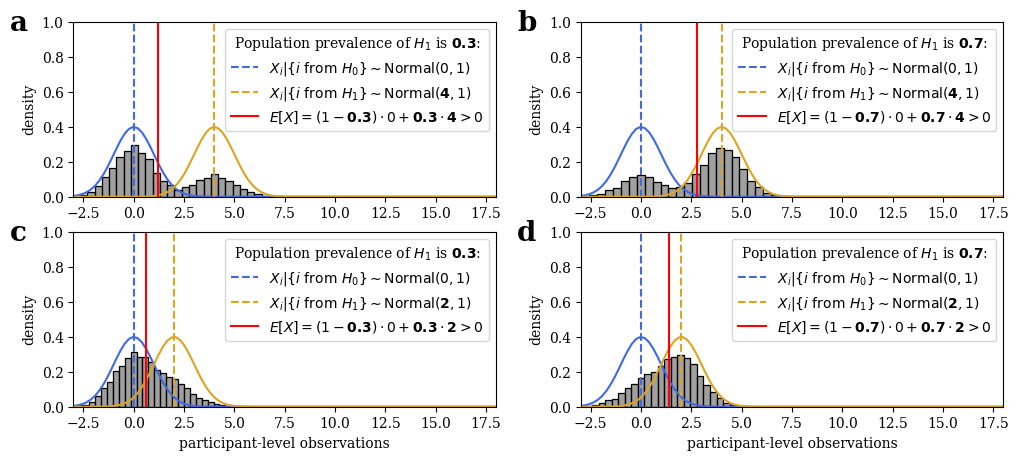

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 10})

def plot_mixture(mu, prev, ax):
    xmax = 18
    x = np.linspace(-3, xmax, 100)
    y0 = norm.pdf(x, 0, 1)
    y1 = norm.pdf(x, mu, 1)
    n = 10000
    # sample from two distributions with probability `prev`
    X0 = norm.rvs(0, 1, n, random_state = 0)
    X1 = norm.rvs(mu, 1, n, random_state = 1)
    X = np.stack([X0, X1])
    rng = np.random.default_rng(0)
    X = X[rng.binomial(1, prev, size = n), np.arange(X.shape[1])]
    sns.histplot(X, ax = ax, stat = 'density', color = 'gray', bins = 30)
    # overlay underlying distributions
    ax.set_xlim(-3, xmax)
    ax.set_ylim(0, 1)
    ax.plot(x, y0, color = 'royalblue')
    ax.axvline(0, linestyle = '--', color = 'royalblue', label = r'$X_i|\{i\text{ from }H_0\} \sim \text{Normal}(0, 1)$')
    ax.plot(x, y1, color = 'goldenrod')
    ax.axvline(mu, linestyle = '--', color = 'goldenrod', label = r'$X_i|\{i\text{ from }H_1\} \sim \text{Normal}(\mathbf{%.0f}, 1)$'%mu)
    ax.set_xlabel('participant-level observations')
    ax.set_ylabel('density')
    ax.axvline(
        0*(1-prev) + mu*prev, color = 'red', 
        label = r'$E[X] = (1 - \mathbf{%.1f}) \cdot 0 + \mathbf{%.1f} \cdot \mathbf{%.0f} > 0$'%(prev, prev, mu)
    )
    ax.legend(
        title = r'Population prevalence of $H_1$ is $\mathbf{%.1f}$:'%prev, 
        #title_fontproperties = {'weight': 'bold'},
        loc = 'upper right'
    )

def add_label(ax, label, x_offset = .15):
    xmin, xmax = ax.get_xlim()
    xscale = xmax - xmin
    ymin, ymax = ax.get_ylim()
    yscale = ymax - ymin
    ax.text(
        xmin - x_offset * xscale, ymax - .05 * yscale, 
        label, size = 20, weight = 'bold'
    )

fig, axs = plt.subplots(2, 2, figsize = (12, 5))
plot_mixture(4, .3, axs[0, 0])
axs[0, 0].set_xlabel('')
add_label(axs[0, 0], 'a')
plot_mixture(4, .7, axs[0, 1])
axs[0, 1].set_xlabel('')
add_label(axs[0, 1], 'b')
plot_mixture(2, .3, axs[1, 0])
add_label(axs[1, 0], 'c')
plot_mixture(2, .7, axs[1, 1])
add_label(axs[1, 1], 'd')

if not os.path.exists('figures'):
    os.mkdir('figures')
fpath = os.path.join('figures', 'illustration.jpeg')
plt.savefig(fpath, dpi = 500, bbox_inches = 'tight')
plt.show()